In [1]:
import numpy as np
from tabulate import tabulate
import math
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA

plt.style.use('seaborn-whitegrid')

# 2 Linear Regression with non-linear functions

## 2.1 Tasks

In [2]:
def f(x):
    return (np.exp(-x/2) * np.sin(np.pi * x)) + np.sin((3 * np.pi * x) / 2)

In [3]:
def generate_points(n, func, bound_1, bound_2, seed=3):
    np.random.seed(seed)

    rn = np.random.uniform(bound_1, bound_2, n)
    X = np.reshape(np.sort(rn, axis=0), (n, 1))
    noise = np.random.normal(0, 0.2, n).reshape(-1, 1)
    Y = (func(X) + noise).reshape(-1, 1)
    return X, Y

X, Y = generate_points(20, f, -2, 2)

### Figure 2.1.1

In [4]:
plt.rcParams['figure.figsize'] = [15, 7]

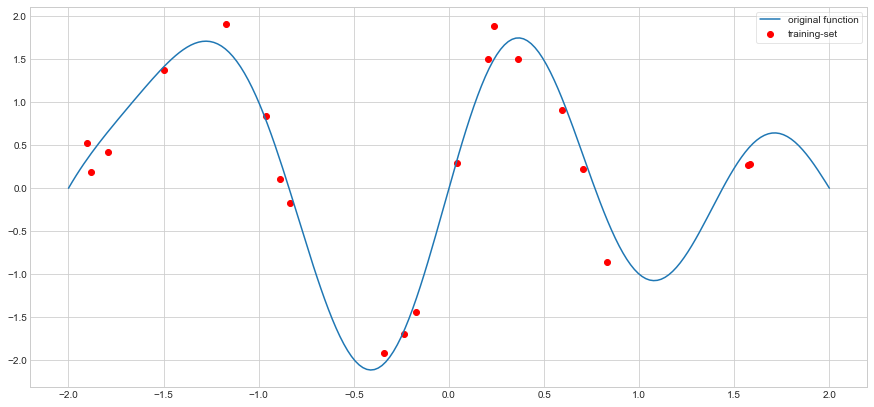

In [5]:
X, Y = generate_points(20, f, -2, 2)

plt.plot(np.linspace(-2, 2, 200), f(np.linspace(-2, 2, 200)), label='original function')
plt.scatter(X, Y, c='r', marker='o', label='training-set')

plt.legend(frameon=True, framealpha=0.5)
plt.show()

In [6]:
def polynomial_basis_fn(x, degree):
    return x ** degree

def gaussian_basis_fn(x, mu, sigma=0.1):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)

def make_design(X, basisfn, basisfn_locs=None):
    if basisfn_locs is None:
        return np.concatenate([np.ones(X.shape), basisfn(X)], axis=1)
    else:
        return np.concatenate([np.ones(X.shape)] + [basisfn(X, loc) for loc in basisfn_locs], axis=1)
    
def g(x, W):
    y = 0
    j = 0
    for w in W:
        y += w * (x ** j)
        j += 1
    return y

def g_(x, W, sigma=0.3):
    y = 0
    p = len(W) - 1
    if (p-1 <= 0) : 
        return np.zeros(len(x))
        j = []
    else :
        j = np.arange(-2, 2.001, 4/(p-1))
        
    for i in range(len(j)):
        y += W[i+1] * gaussian_basis_fn(x, j[i], sigma)
    return y

def error(x, og_fn, pd_fn, W):
    og_y = og_fn(x)
    pd_y = pd_fn(x, W)
    return np.mean((pd_y - og_y) ** 2)

In [7]:
def polynomial_curve_fitting(p, l, X, Y) :
    
    # p --> precision
    # l --> lambda
    # X, Y --> inputs
    
    j = np.arange(1, p+1, 1)
    I = np.eye(p+1)
    A = make_design(X, polynomial_basis_fn, j)
    AT = np.transpose(A)

    return np.dot(np.linalg.inv(AT@A + (l * I)), AT@Y)

def gaussian_curve_fitting(p, l, X, Y) :
    
    # p --> precision
    # l --> lambda
    # X, Y --> inputs
    
    if (p-1 <= 0) : 
        j = [0]
    else :
        j = np.arange(-2, 2.001, 4/(p-1))
        
    A = make_design(X, gaussian_basis_fn, j)    
    AT = np.transpose(A)
    
    f1 = np.linalg.inv(AT@A + l*np.identity((np.shape(A)[1])))
    return np.dot(np.linalg.inv(AT@A + l*np.identity((np.shape(A)[1]))), AT@Y)  

In [8]:
def g_illustrative(x, W, sigma=0.3, plot=plt):
    y = 0
    p = len(W) - 1
    if (p-1 <= 0) : 
        return np.zeros(len(x))
        j = []
    else :
        j = np.arange(-2, 2.001, 4/(p-1))
        
    i = len(j)-1
    y += W[i+1] * gaussian_basis_fn(x, j[i], sigma)
    plot.plot(np.linspace(-2, 2, 100), W[i+1] * gaussian_basis_fn(np.linspace(-2, 2, 100), j[i], sigma), c='C2', linestyle=':', label='Gaussian RBF')
    
    for i in range(len(j)-1):
        y += W[i+1] * gaussian_basis_fn(x, j[i], sigma)
        plot.plot(np.linspace(-2, 2, 100), W[i+1] * gaussian_basis_fn(np.linspace(-2, 2, 100), j[i], sigma), c='C2', linestyle=':')
    return y

### Figure 2.1.2

In [9]:
plt.rcParams['figure.figsize'] = [15, 7]

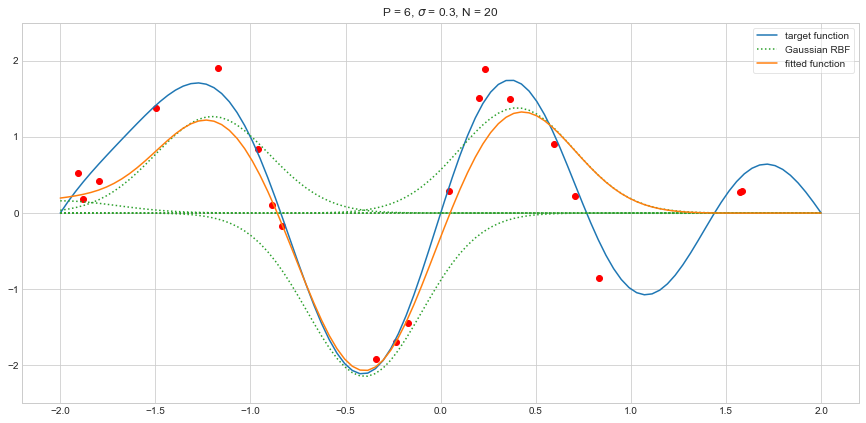

In [10]:
l = np.exp(-1)

N = 20
X, Y = generate_points(N, f, -2, 2)

p = 6
sigma = 0.3
W = gaussian_curve_fitting(p, l, X, Y)
plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), label='target function')
plt.plot(np.linspace(-2, 2, 100), g_illustrative(np.linspace(-2, 2, 100), W, sigma=sigma), label='fitted function')
plt.scatter(X, Y, c='r')
plt.title('P = {p}, $\sigma$ = {sigma}, N = {N}'.format(p=p, sigma = sigma, N=N))
plt.axis((None, None, -2.5, 2.5))
plt.legend(frameon=True, framealpha=0.5)

plt.legend(frameon=True, framealpha=0.5)
plt.show()

### Figure 2.1.3

In [11]:
plt.rcParams['figure.figsize'] = [15, 7]

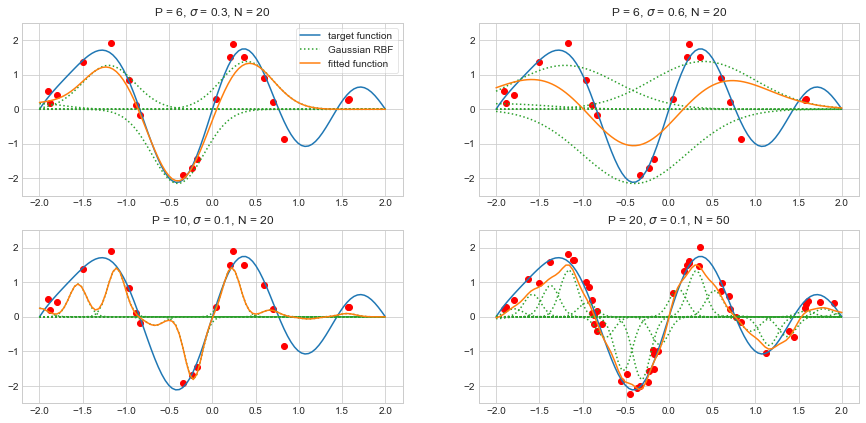

In [12]:
figure, axis = plt.subplots(2, 2)

l = np.exp(-1)

N = 20
X, Y = generate_points(N, f, -2, 2)

p = 6
sigma = 0.3
W = gaussian_curve_fitting(p, l, X, Y)
axis[0,0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), label='target function')
axis[0,0].plot(np.linspace(-2, 2, 100), g_illustrative(np.linspace(-2, 2, 100), W, plot=axis[0,0], sigma=sigma), label='fitted function')
axis[0,0].scatter(X, Y, c='r')
axis[0,0].set_title('P = {p}, $\sigma$ = {sigma}, N = {N}'.format(p=p, sigma = sigma, N=N))
axis[0,0].axis((None, None, -2.5, 2.5))
axis[0,0].legend(frameon=True, framealpha=0.5)

p = 6
sigma = 0.6
W = gaussian_curve_fitting(p, l, X, Y)
axis[0,1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), label='target function')
axis[0,1].plot(np.linspace(-2, 2, 100), g_illustrative(np.linspace(-2, 2, 100), W, plot=axis[0,1], sigma=sigma), label='fitted function')
axis[0,1].scatter(X, Y, c='r')
axis[0,1].set_title('P = {p}, $\sigma$ = {sigma}, N = {N}'.format(p=p, sigma=sigma, N=N))
axis[0,1].axis((None, None, -2.5, 2.5))

p = 10
sigma = 0.1
W = gaussian_curve_fitting(p, l, X, Y)
axis[1,0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), label='target function')
axis[1,0].plot(np.linspace(-2, 2, 100), g_illustrative(np.linspace(-2, 2, 100), W, plot=axis[1,0], sigma=sigma), label='fitted function')
axis[1,0].scatter(X, Y, c='r')
axis[1,0].set_title('P = {p}, $\sigma$ = {sigma}, N = {N}'.format(p=p, sigma = sigma, N=N))
axis[1,0].axis((None, None, -2.5, 2.5))

N = 50
X, Y = generate_points(N, f, -2, 2)
p = 20
sigma = 0.1
W = gaussian_curve_fitting(p, l, X, Y)
axis[1,1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), label='target function')
axis[1,1].plot(np.linspace(-2, 2, 100), g_illustrative(np.linspace(-2, 2, 100), W, plot=axis[1,1], sigma=sigma), label='fitted function')
axis[1,1].scatter(X, Y, c='r')
axis[1,1].set_title('P = {p}, $\sigma$ = {sigma}, N = {N}'.format(p=p, sigma = sigma, N=N))
axis[1,1].axis((None, None, -2.5, 2.5))

plt.show()

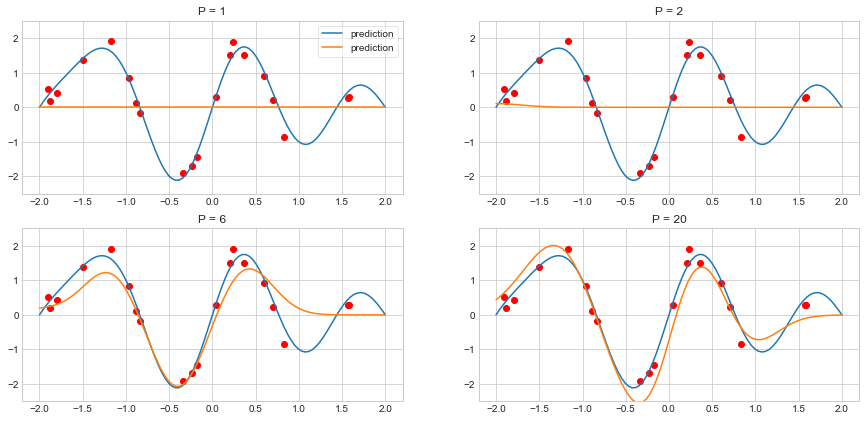

In [13]:
figure, axis = plt.subplots(2, 2)
X, Y = generate_points(20, f, -2, 2)

l = np.exp(-1)

p = 1
W = gaussian_curve_fitting(p, l, X, Y)
axis[0,0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), label='prediction')
axis[0,0].plot(np.linspace(-2, 2, 100), g_(np.linspace(-2, 2, 100), W), label='prediction')
axis[0,0].scatter(X, Y, c='r')
axis[0,0].set_title('P = {p}'.format(p=p))
axis[0,0].axis((None, None, -2.5, 2.5))

p = 2
W = gaussian_curve_fitting(p, l, X, Y)
axis[0,1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[0,1].plot(np.linspace(-2, 2, 100), g_(np.linspace(-2, 2, 100), W))
axis[0,1].scatter(X, Y, c='r')
axis[0,1].set_title('P = {p}'.format(p=p))
axis[0,1].axis((None, None, -2.5, 2.5))

p = 6
W = gaussian_curve_fitting(p, l, X, Y)
axis[1,0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[1,0].plot(np.linspace(-2, 2, 100), g_(np.linspace(-2, 2, 100), W))
axis[1,0].scatter(X, Y, c='r')
axis[1,0].set_title('P = {p}'.format(p=p))
axis[1,0].axis((None, None, -2.5, 2.5))

p = 20
W = gaussian_curve_fitting(p, l, X, Y)
axis[1,1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[1,1].plot(np.linspace(-2, 2, 100), g_(np.linspace(-2, 2, 100), W))
axis[1,1].scatter(X, Y, c='r')
axis[1,1].set_title('P = {p}'.format(p=p))
axis[1,1].axis((None, None, -2.5, 2.5))

axis[0,0].legend(frameon=True, framealpha=0.5)
plt.show()

### Figure 2.1.4

In [14]:
plt.rcParams['figure.figsize'] = [15, 7]

0.0417091538347555


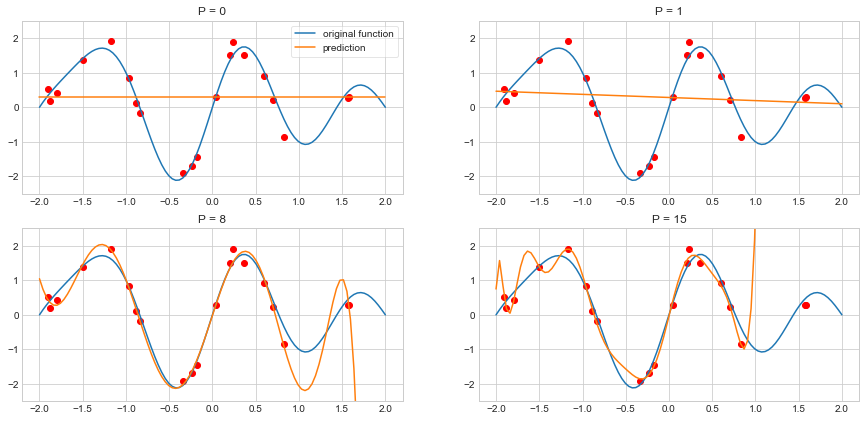

In [15]:
figure, axis = plt.subplots(2, 2)
X, Y = generate_points(20, f, -2, 2)

l = 0

p = 0
W = polynomial_curve_fitting(p, l, X, Y)
axis[0,0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), label='original function')
axis[0,0].plot(np.linspace(-2, 2, 100), g(np.linspace(-2, 2, 100), W), label='prediction')
axis[0,0].scatter(X, Y, c='r')
axis[0,0].set_title('P = {p}'.format(p=p))
axis[0,0].axis((None, None, -2.5, 2.5))

p = 1
W = polynomial_curve_fitting(p, l, X, Y)
axis[0,1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[0,1].plot(np.linspace(-2, 2, 100), g(np.linspace(-2, 2, 100), W))
axis[0,1].scatter(X, Y, c='r')
axis[0,1].set_title('P = {p}'.format(p=p))
axis[0,1].axis((None, None, -2.5, 2.5))

p = 8
W = polynomial_curve_fitting(p, l, X, Y)
axis[1,0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[1,0].plot(np.linspace(-2, 2, 100), g(np.linspace(-2, 2, 100), W))
axis[1,0].scatter(X, Y, c='r')
axis[1,0].set_title('P = {p}'.format(p=p))
axis[1,0].axis((None, None, -2.5, 2.5))

p = 15
W = polynomial_curve_fitting(p, l, X, Y)
axis[1,1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[1,1].plot(np.linspace(-2, 2, 100), g(np.linspace(-2, 2, 100), W))
axis[1,1].scatter(X, Y, c='r', label='training-data')
axis[1,1].set_title('P = {p}'.format(p=p))
axis[1,1].axis((None, None, -2.5, 2.5))

axis[0,0].legend(frameon=True, framealpha=0.5)

print(error(X, f, g, W))

### Figure 2.1.5

In [16]:
plt.rcParams['figure.figsize'] = [15, 6]

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


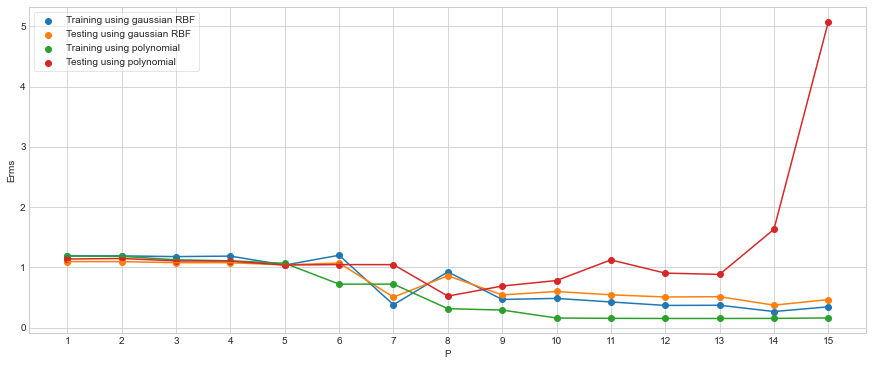

In [17]:
figure, axis = plt.subplots(1)

X, Y = generate_points(50, f, -2, 2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

erms_train_p = []
erms_test_p = []
erms_train_g = []
erms_test_g = []

P = 15
l = np.exp(0)
for p in range(P):
    erms_test_p.append(math.sqrt(error(X_test, f, g, polynomial_curve_fitting(p, 0, X_train, Y_train))))
    erms_train_p.append(math.sqrt(error(X_train, f, g, polynomial_curve_fitting(p, 0, X_train, Y_train))))
    erms_test_g.append(math.sqrt(error(X_test, f, g_, gaussian_curve_fitting(p, l, X_train, Y_train))))
    erms_train_g.append(math.sqrt(error(X_train, f, g_, gaussian_curve_fitting(p, l, X_train, Y_train))))
    
print(np.linspace(1, P, P))

plt.plot(np.linspace(1, P, P), erms_train_g)
plt.scatter(np.linspace(1, P, P), erms_train_g, label='Training using gaussian RBF')

plt.plot(np.linspace(1, P, P), erms_test_g)
plt.scatter(np.linspace(1, P, P), erms_test_g, label='Testing using gaussian RBF')

plt.plot(np.linspace(1, P, P), erms_train_p)
plt.scatter(np.linspace(1, P, P), erms_train_p, label='Training using polynomial')

plt.plot(np.linspace(1, P, P), erms_test_p)
plt.scatter(np.linspace(1, P, P), erms_test_p, label='Testing using polynomial')

plt.xlabel('P')
plt.ylabel('Erms')
plt.legend(frameon=True, framealpha=0.5)
axis.xaxis.set_major_locator(plt.matplotlib.ticker.MultipleLocator(base=1))

plt.show()

### Figure 2.1.6

In [18]:
info = {'using \npolynomial': ['w\u2080','w\u2081','w\u2082','w\u2083','w\u2084','w\u2085','w\u2086','w\u2087','w\u2088','w\u2089',
            'w\u2081\u2080','w\u2081\u2081','w\u2081\u2082','w\u2081\u2083','w\u2081\u2084','w\u2081\u2085'],
        'P=0': np.around(polynomial_curve_fitting(0, 0, X, Y), decimals=2),
        'P=1': np.around(polynomial_curve_fitting(1, 0, X, Y), decimals=2),
        'P=6': np.around(polynomial_curve_fitting(6, 0, X, Y), decimals=2),
        'P=15': np.around(polynomial_curve_fitting(15, 0, X, Y), decimals=2),
        'using \ngaussian': ['w\u2080','w\u2081','w\u2082','w\u2083','w\u2084','w\u2085','w\u2086','w\u2087','w\u2088','w\u2089',
            'w\u2081\u2080','w\u2081\u2081','w\u2081\u2082','w\u2081\u2083','w\u2081\u2084','w\u2081\u2085'],
        'P=1 ': np.around(gaussian_curve_fitting(1, l, X, Y), decimals=2),
        'P=2 ': np.around(gaussian_curve_fitting(2, l, X, Y), decimals=2),
        'P=9 ': np.around(gaussian_curve_fitting(9, l, X, Y), decimals=2),
        'P=15 ': np.around(gaussian_curve_fitting(15, l, X, Y), decimals=2)}

print(tabulate(info, headers='keys', tablefmt='fancy_grid'))

╒══════════════╤═══════╤═══════╤═══════╤════════╤════════════╤════════╤════════╤════════╤═════════╕
│ using        │   P=0 │   P=1 │   P=6 │   P=15 │ using      │   P=1  │   P=2  │   P=9  │   P=15  │
│ polynomial   │       │       │       │        │ gaussian   │        │        │        │         │
╞══════════════╪═══════╪═══════╪═══════╪════════╪════════════╪════════╪════════╪════════╪═════════╡
│ w₀           │  0.12 │  0.12 │ -0.3  │   0.14 │ w₀         │   0.13 │   0.12 │   0.1  │    0.15 │
├──────────────┼───────┼───────┼───────┼────────┼────────────┼────────┼────────┼────────┼─────────┤
│ w₁           │       │ -0.07 │  2.48 │   8.23 │ w₁         │  -0.22 │   0.11 │   0.12 │    0.01 │
├──────────────┼───────┼───────┼───────┼────────┼────────────┼────────┼────────┼────────┼─────────┤
│ w₂           │       │       │  0.88 │  -2.71 │ w₂         │        │   0.14 │   0.82 │    0.42 │
├──────────────┼───────┼───────┼───────┼────────┼────────────┼────────┼────────┼────────┼─────────┤


### Figure 2.1.7

In [19]:
plt.rcParams['figure.figsize'] = [15, 3]

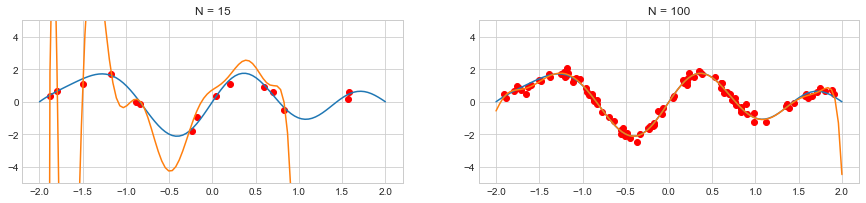

In [20]:
figure, axis = plt.subplots(1, 2)

l = np.exp(0)

N = 15
X, Y = generate_points(N, f, -2, 2)
W = polynomial_curve_fitting(15, 0, X, Y)

axis[0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[0].plot(np.linspace(-2, 2, 100), g(np.linspace(-2, 2, 100), W))
axis[0].scatter(X, Y, c='r')
axis[0].set_title('N = {N}'.format(N=N))
axis[0].axis((None, None, -5, 5))

N = 100
X, Y = generate_points(N, f, -2, 2)
W = polynomial_curve_fitting(15, 0, X, Y)

axis[1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[1].plot(np.linspace(-2, 2, 100), g(np.linspace(-2, 2, 100), W))
axis[1].scatter(X, Y, c='r')
axis[1].set_title('N = {N}'.format(N=N))
axis[1].axis((None, None, -5, 5))

plt.show()

### Figure 2.1.8

In [21]:
plt.rcParams['figure.figsize'] = [15, 3]

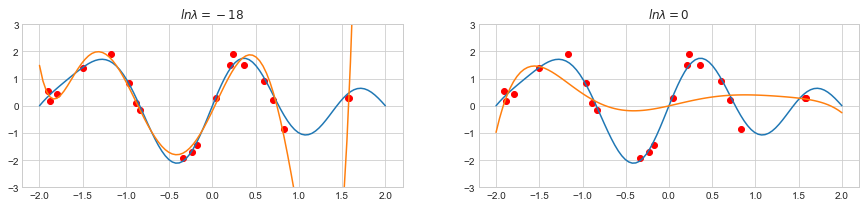

In [22]:
figure, axis = plt.subplots(1, 2)

X, Y = generate_points(20, f, -2, 2)

W = polynomial_curve_fitting(6, np.exp(-18), X, Y)

axis[0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[0].plot(np.linspace(-2, 2, 100), g(np.linspace(-2, 2, 100), W))
axis[0].scatter(X, Y, c='r')
axis[0].set_title('$ln\lambda = -18$')
axis[0].axis((None, None, -3, 3))

W = polynomial_curve_fitting(6, np.exp(0), X, Y)

axis[1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[1].plot(np.linspace(-2, 2, 100), g(np.linspace(-2, 2, 100), W))
axis[1].scatter(X, Y, c='r')
axis[1].set_title('$ln\lambda = 0$')
axis[1].axis((None, None, -3, 3))

plt.show()

### Figure 2.1.10

In [23]:
plt.rcParams['figure.figsize'] = [15, 7]

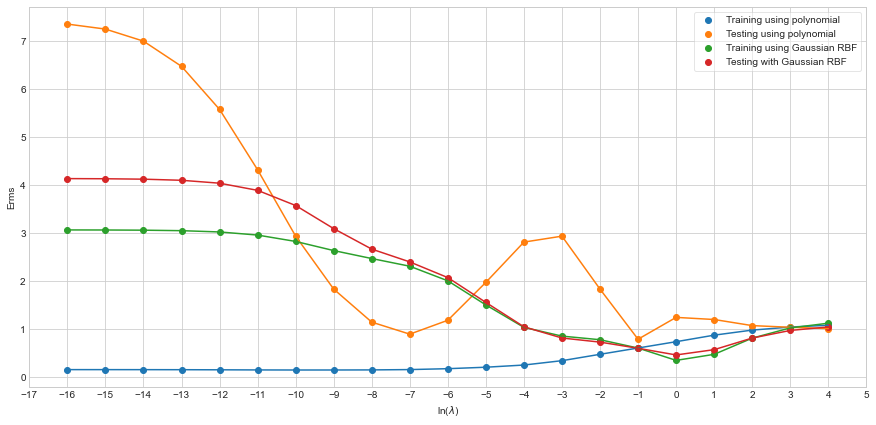

In [24]:
figure, axis = plt.subplots(1)
X, Y = generate_points(50, f, -2, 2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

erms_train_p = []
erms_test_p = []
erms_train_g = []
erms_test_g = []
start = -16
end = 5
length = abs(start - end)

for l in range(start, end):
    erms_test_p.append(math.sqrt(error(X_test, f, g, polynomial_curve_fitting(15, np.exp(l), X_train, Y_train))))
    erms_train_p.append(math.sqrt(error(X_train, f, g, polynomial_curve_fitting(15, np.exp(l), X_train, Y_train))))
    erms_test_g.append(math.sqrt(error(X_test, f, g_, gaussian_curve_fitting(15, np.exp(l), X_train, Y_train))))
    erms_train_g.append(math.sqrt(error(X_train, f, g_, gaussian_curve_fitting(15, np.exp(l), X_train, Y_train))))
    
plt.plot(np.linspace(start, end-1, length), erms_train_p)
plt.scatter(np.linspace(start, end-1, length), erms_train_p, label='Training using polynomial')

plt.plot(np.linspace(start, end-1, length), erms_test_p)
plt.scatter(np.linspace(start, end-1, length), erms_test_p, label='Testing using polynomial')

plt.plot(np.linspace(start, end-1, length), erms_train_g)
plt.scatter(np.linspace(start, end-1, length), erms_train_g, label='Training using Gaussian RBF')

plt.plot(np.linspace(start, end-1, length), erms_test_g)
plt.scatter(np.linspace(start, end-1, length), erms_test_g, label='Testing with Gaussian RBF')

plt.xlabel('ln($\lambda$)')
plt.ylabel('Erms')
plt.legend(frameon=True, framealpha=0.5)
axis.xaxis.set_major_locator(plt.matplotlib.ticker.MultipleLocator(base=1))
plt.show()

### Figure 2.1.9

In [25]:
info = {'': ['w\u2080','w\u2081','w\u2082','w\u2083','w\u2084','w\u2085','w\u2086','w\u2087','w\u2088','w\u2089',
            'w\u2081\u2080','w\u2081\u2081','w\u2081\u2082','w\u2081\u2083','w\u2081\u2084','w\u2081\u2085'],
        'lnλ=-inf': np.around(polynomial_curve_fitting(15, 0, X, Y), decimals=2),
        'lnλ=-18': np.around(polynomial_curve_fitting(15, np.exp(-18), X, Y), decimals=2),
        'lnλ=0': np.around(polynomial_curve_fitting(15, np.exp(0), X, Y), decimals=2)}

print(tabulate(info, headers='keys', tablefmt='fancy_grid'))

╒═════╤════════════╤═══════════╤═════════╕
│     │   lnλ=-inf │   lnλ=-18 │   lnλ=0 │
╞═════╪════════════╪═══════════╪═════════╡
│ w₀  │       0.14 │      0.14 │   -0.22 │
├─────┼────────────┼───────────┼─────────┤
│ w₁  │       8.23 │      8.23 │    1.98 │
├─────┼────────────┼───────────┼─────────┤
│ w₂  │      -2.71 │     -2.71 │    0.2  │
├─────┼────────────┼───────────┼─────────┤
│ w₃  │     -27.51 │    -27.51 │   -1.59 │
├─────┼────────────┼───────────┼─────────┤
│ w₄  │       4    │      3.99 │    0.32 │
├─────┼────────────┼───────────┼─────────┤
│ w₅  │      39.46 │     39.45 │   -1.07 │
├─────┼────────────┼───────────┼─────────┤
│ w₆  │       0.7  │      0.7  │    0.09 │
├─────┼────────────┼───────────┼─────────┤
│ w₇  │     -36.22 │    -36.21 │   -0.17 │
├─────┼────────────┼───────────┼─────────┤
│ w₈  │      -3.78 │     -3.78 │   -0.1  │
├─────┼────────────┼───────────┼─────────┤
│ w₉  │      21.12 │     21.11 │    0.4  │
├─────┼────────────┼───────────┼─────────┤
│ w₁₀ │    

### Figure 2.1.11

In [26]:
plt.rcParams['figure.figsize'] = [15, 5]

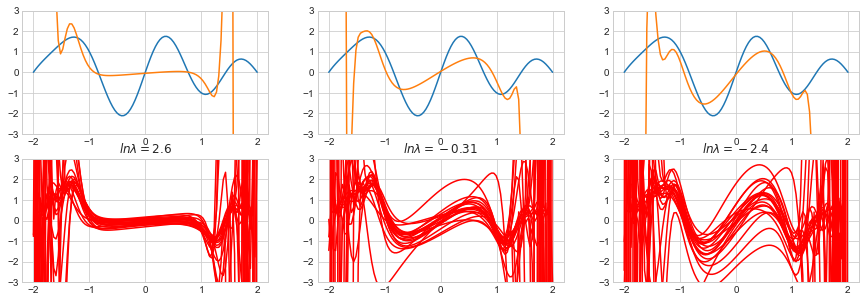

In [27]:
figure, axis = plt.subplots(2, 3)

axis[0,0].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[0,1].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))
axis[0,2].plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)))

Y1 = []
Y2 = []
Y3 = []

for i in range(0, 20):
    X, Y = generate_points(30, f, -2, 2, i)
    
    W = polynomial_curve_fitting(30, np.exp(2.6), X, Y)
    Y_ = g(np.linspace(-2, 2, 100), W)
    Y1.append(Y_)
    axis[1,0].plot(np.linspace(-2, 2, 100), Y_, c='r')
    
    W = polynomial_curve_fitting(30, np.exp(-0.31), X, Y)
    Y_ = g(np.linspace(-2, 2, 100), W)
    Y2.append(Y_)
    axis[1,1].plot(np.linspace(-2, 2, 100), Y_, c='r')
    
    W = polynomial_curve_fitting(30, np.exp(-2.4), X, Y)
    Y_ = g(np.linspace(-2, 2, 100), W)
    Y3.append(Y_)
    axis[1,2].plot(np.linspace(-2, 2, 100), Y_, c='r')
    
axis[0,0].plot(np.linspace(-2, 2, 100), np.average(Y1, axis=0))
axis[0,1].plot(np.linspace(-2, 2, 100), np.average(Y2, axis=0))
axis[0,2].plot(np.linspace(-2, 2, 100), np.average(Y3, axis=0))
axis[0,0].axis((None, None, -3, 3))
axis[0,1].axis((None, None, -3, 3))
axis[0,2].axis((None, None, -3, 3))

axis[1,0].set_title('$ln \lambda = 2.6$')    
axis[1,1].set_title('$ln \lambda = -0.31$')
axis[1,2].set_title('$ln \lambda = -2.4$')
axis[1,0].axis((None, None, -3, 3))
axis[1,1].axis((None, None, -3, 3))
axis[1,2].axis((None, None, -3, 3))

plt.show()

# Classification

## 3.1 Data 1: separate 2 Gaussians

In [28]:
def make_plot(points, plot, m='x', label=None):
    X, Y = np.split(points, [-1], axis=1)
    plot.scatter(X, Y, marker=m, s=40, label=label)
    

def S(p, s1, s2):
    return ((s1**2, p*s1*s2),(p*s1*s2, s2**2))

### Figure 3.1.1

In [29]:
plt.rcParams['figure.figsize'] = [5, 5]

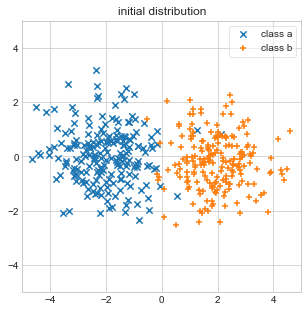

In [30]:
na = 200
mu_A = (-2, 0)
sigma_A1 = 1
sigma_A2 = 1
p_A = 0

nb = 200
mu_B = (2, 0)
sigma_B1 = 1
sigma_B2 = 1
p_B = 0

cov_matrix_A = S(p_A, sigma_A1, sigma_A2)
cov_matrix_B = S(p_B, sigma_B1, sigma_B2)

np.random.seed(2)
XA = np.random.multivariate_normal(mu_A, cov_matrix_A, na)
XB = np.random.multivariate_normal(mu_B, cov_matrix_B, nb)

make_plot(XA, plt, 'x', label='class a')
make_plot(XB, plt, '+', label='class b')
    
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title('initial distribution')
plt.legend(frameon=True, framealpha=0.5)
plt.show()

In [31]:
def Y(X, w):
    return np.transpose(np.dot(X, np.reshape(w, (2,1))))[0]

def mu(X):
    return np.mean(X, axis=0)

def sigma(X):
    r = 0; n = len(X); c = mu(X)
    for i in X:
        r += np.linalg.norm(i - c) ** 2
        
    return (r/n)

### Figure 3.1.2

In [32]:
plt.rcParams['figure.figsize'] = [10, 5]

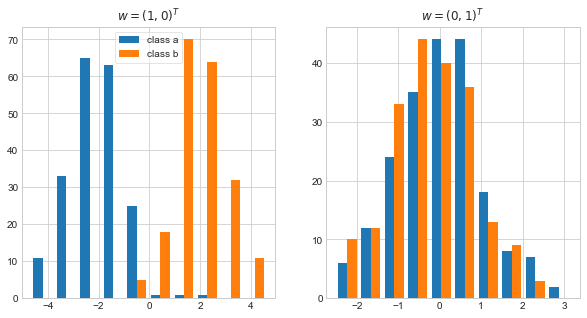

In [33]:
figure, axis = plt.subplots(1, 2)
np.random.seed(2)

w1 = (1,0) #goes through the means of our distributions, expecting a good result
w2 = (0,1) #beyond stupid, will not help us in the slightest to classify these points

YA = Y(XA, w1)
YB = Y(XB, w1)
Y_ = [YA, YB]
labels = [ 'class a', 'class b' ]
axis[0].hist(Y_, label=labels)
axis[0].set_title('$w = (1,0)^T$')

YA = Y(XA, w2)
YB = Y(XB, w2)
Y_ = [YA, YB]
labels = [ 'class a', 'class b' ]
axis[1].hist(Y_, label=labels)
axis[1].set_title('$w = (0,1)^T$')

axis[0].legend(frameon=True, framealpha=0.5)
plt.show()

In [34]:
def make_hist(mu_A, mu_B, sigma1, sigma2, p, n, w, plot):
    
    # mu_A, mu_B --> respective averages of our 2 datasets
    # sigma1, sigma2 --> sigmas of our covariance matrix
    # p --> relation between sigmas
    # n --> number of random points to generate
    # w --> vector to project onto
    # plot --> plot we which to draw hist on
    
    np.random.seed(2)

    cov_matrix = S(p, sigma1, sigma2)
    XA = np.random.multivariate_normal(mu_A, cov_matrix, n)
    XB = np.random.multivariate_normal(mu_B, cov_matrix, n)
    
    mu_a = mu(XA)
    mu_b = mu(XB)
    sigma_a = sigma(XA)
    sigma_b = sigma(XB)
    
    labels = [ '$\mu_a$ = {mu_a} \n $\sigma_a^2$ = {sigma_a}'.format(mu_a=np.around(mu_a,decimals=1), sigma_a=np.around(sigma_a,decimals=1)), '$\mu_b$ = {mu_b} \n $\sigma_b^2$ = {sigma_b}'.format(mu_b=np.around(mu_b,decimals=1), sigma_b=np.around(sigma_b,decimals=1)) ]
    
    Y_ = [Y(XA, w), Y(XB, w)]
    plot.hist(Y_, label= labels)

### Figure 3.1.3

In [35]:
plt.rcParams['figure.figsize'] = [10, 10]

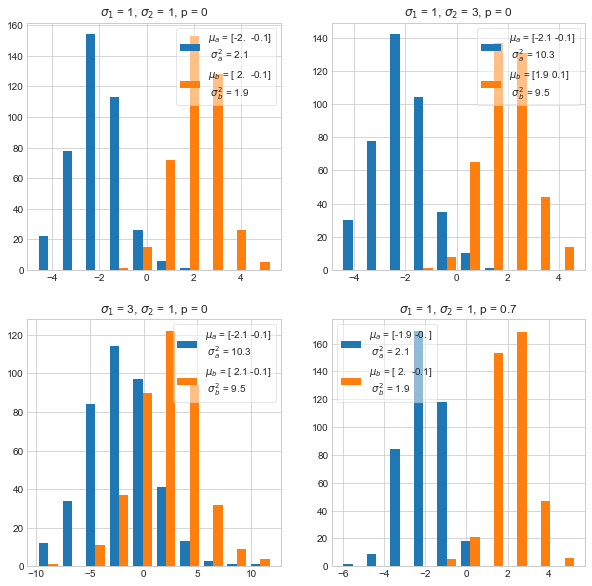

In [36]:
figure, axis = plt.subplots(2, 2)

n = 400
mu_A = (-2, 0)
mu_B = (2, 0)
w = (1, 0)

sigma1 = 1
sigma2 = 1
p = 0

make_hist(mu_A, mu_B, sigma1, sigma2, p, n, w, axis[0,0])
axis[0,0].set_title('$\sigma_1$ = {sigma1}, $\sigma_2$ = {sigma2}, p = {p}'.format(sigma1=sigma1, sigma2=sigma2, p=p))
axis[0,0].legend(frameon=True, framealpha=0.5)

sigma1 = 3
sigma2 = 1
p = 0

make_hist(mu_A, mu_B, sigma1, sigma2, p, n, w, axis[1,0])
axis[1,0].set_title('$\sigma_1$ = {sigma1}, $\sigma_2$ = {sigma2}, p = {p}'.format(sigma1=sigma1, sigma2=sigma2, p=p))
axis[1,0].legend(frameon=True, framealpha=0.5)

sigma1 = 1
sigma2 = 3
p = 0

make_hist(mu_A, mu_B, sigma1, sigma2, p, n, w, axis[0,1])
axis[0,1].set_title('$\sigma_1$ = {sigma1}, $\sigma_2$ = {sigma2}, p = {p}'.format(sigma1=sigma1, sigma2=sigma2, p=p))
axis[0,1].legend(frameon=True, framealpha=0.5)

sigma1 = 1
sigma2 = 1
p = 0.7

make_hist(mu_A, mu_B, sigma1, sigma2, p, n, w, axis[1,1])
axis[1,1].set_title('$\sigma_1$ = {sigma1}, $\sigma_2$ = {sigma2}, p = {p}'.format(sigma1=sigma1, sigma2=sigma2, p=p))
axis[1,1].legend(frameon=True, framealpha=0.5)

plt.show()

### Figure 3.1.4

In [37]:
plt.rcParams['figure.figsize'] = [10, 5]

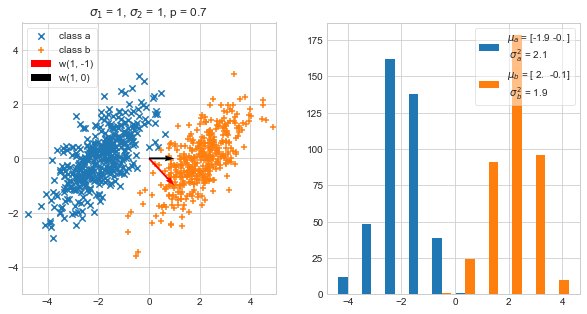

In [38]:
figure, axis = plt.subplots(1, 2)

sigma1 = 1
sigma2 = 1
p = 0.7

w = (1,-1)

make_hist(mu_A, mu_B, sigma1, sigma2, p, n, w, axis[1])
axis[1].legend(frameon=True, framealpha=0.5)

cov_matrix = S(p, sigma1, sigma2)

np.random.seed(2)
XA_ = np.random.multivariate_normal(mu_A, cov_matrix, n)
XB_ = np.random.multivariate_normal(mu_B, cov_matrix, n)

make_plot(XA_, axis[0], 'x', label='class a')
make_plot(XB_, axis[0], '+', label='class b')
axis[0].quiver([0], [0], [1], [-1], color='r', angles='xy', scale_units='xy', scale=1, label='w(1, -1)')
axis[0].quiver([0], [0], [1], [0], color='k', angles='xy', scale_units='xy', scale=1, label='w(1, 0)')
axis[0].set_title('$\sigma_1$ = {sigma1}, $\sigma_2$ = {sigma2}, p = {p}'.format(sigma1=sigma1, sigma2=sigma2, p=p))

axis[0].set_xlim([-5, 5])
axis[0].set_ylim([-5, 5])
axis[0].legend(frameon=True, framealpha=0.5)

plt.show()

In [39]:
w0 = (1,0)

def R(theta):
    
    # theta --> angle by which to rotate
    
    return ((np.cos(theta), -np.sin(theta)),((np.sin(theta), np.cos(theta))))

def W(theta):
    
    # theta --> angle by which to rotate x0 (1, 0)
    
    return (np.dot(R(theta), w0))

def J(w, Xa, Xb):
    
    # w --> vector to project onto
    # Xa, Xb --> class inputs
    
    na = len(Xa); nb = len(Xb)
    return (((np.linalg.norm(mu(Xa) - mu(Xb))) ** 2)/(((na/(na + nb)) * sigma(Xa)) + ((nb/(na + nb)) * sigma(Xb))))

### Figure 3.1.5

In [40]:
plt.rcParams['figure.figsize'] = [10, 5]

15.17683020670826
3.1111111111111116
[0.99937328 0.0353983 ]


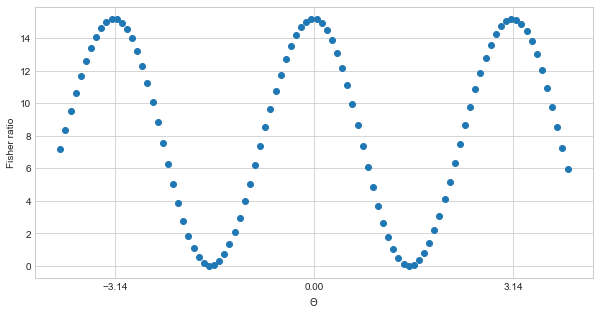

In [41]:
figure, axis = plt.subplots(1)

Y_ = []

X = np.linspace(-4, 4, 100)

for i in X:
    Y_.append(J(W(i), Y(XA,W(i)), Y(XB,W(i))))

print(Y_[np.argmax(Y_)])
print(X[np.argmax(Y_)])
print(W(np.argmax(Y_)))

axis.scatter(X, Y_)

plt.xlabel('$\Theta$')
plt.ylabel('Fisher ratio')
axis.xaxis.set_major_locator(plt.matplotlib.ticker.MultipleLocator(base=np.pi))

plt.show()

### Figure 3.1.6

In [42]:
plt.rcParams['figure.figsize'] = [10, 5]

33.891719091308296
2.545454545454546
[ 0.77668598 -0.62988799]


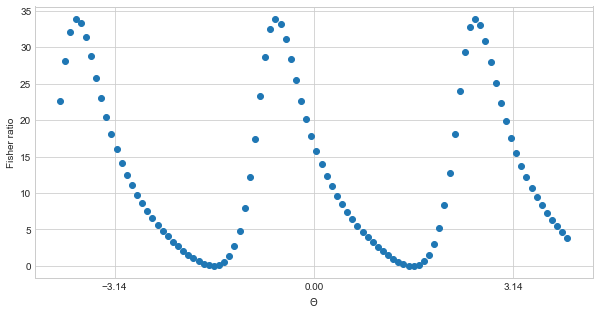

In [43]:
figure, axis = plt.subplots(1)

Y_ = []

X = np.linspace(-4, 4, 100)

for i in X:
    Y_.append(J(W(i), Y(XA_,W(i)), Y(XB_,W(i))))

print(Y_[np.argmax(Y_)])
print(X[np.argmax(Y_)])
print(W(np.argmax(Y_)))

axis.scatter(X, Y_)

plt.xlabel('$\Theta$')
plt.ylabel('Fisher ratio')
axis.xaxis.set_major_locator(plt.matplotlib.ticker.MultipleLocator(base=np.pi))

plt.show()

## 3.2 Data 2: Iris data

In [44]:
iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target
c = []

seto = [] # setosa
vers = [] # versicolor
virg = [] # virginica

for i in range(len(y)):
    if y[i] == 0:
        seto.append(X[i])
    else:
        if y[i] == 1:
            vers.append(X[i])
        else:
            virg.append(X[i])

mu_seto = mu(seto)
mu_vers = mu(vers)
mu_virg = mu(virg)
mu_glob = (mu_seto + mu_vers + mu_virg) / 3

print('\n', mu_seto, '\n', mu_vers, '\n', mu_virg, '\n\n', mu_glob)


 [5.006 3.428 1.462 0.246] 
 [5.936 2.77  4.26  1.326] 
 [6.588 2.974 5.552 2.026] 

 [5.84333333 3.05733333 3.758      1.19933333]


In [45]:
from scipy.linalg import eigh
 
def between_class_cov(X0, X1, X2) :
    
    # X0, X1, X2 --> class inputs
    
    mu_g = mu([mu(X0), mu(X1), mu(X2)])
    N = len(X)
    cov0 = (mu(X0) - mu_g) * np.reshape(mu(X0) - mu_g, (4,1)) * (len(X0)/N)
    cov1 = (mu(X1) - mu_g) * np.reshape(mu(X1) - mu_g, (4,1)) * (len(X1)/N)
    cov2 = (mu(X2) - mu_g) * np.reshape(mu(X2) - mu_g, (4,1)) * (len(X2)/N)
    return cov0 + cov1 + cov2
    
def within_class_cov(X0, X1, X2) :
    
    # X0, X1, X2 --> class inputs
        
    return np.cov(np.transpose(X0)) + np.cov(np.transpose(X1)) + np.cov(np.transpose(X2))

In [46]:
Sb = between_class_cov(seto, vers, virg)
Sw = within_class_cov(seto, vers, virg)

eigvals, eigvecs = eigh(Sb, Sw)
eigvecs = np.transpose(eigvecs)
eigval = eigvals[3]
eigvec = eigvecs[3]
w = eigvec

print('Sb :')
print(Sb)
print('\n Sw :')
print(Sw)
print('\n eigval :')
print(eigval)
print('\n eigvec :')
print(eigvec)
print('\n eigvals :')
print(eigvals)
print('\n eigvecs :')
print(eigvecs)
print('\n Sb @ w :')
print(Sb @ w)
print('\n v * Sw @ w :')
print(eigval * Sw @ w)
print('\n Sb @ w - v * Sw @ w :')
print((Sb @ w) - (eigval * Sw @ w))

Sb :
[[ 0.42141422 -0.13301778  1.101656    0.47519556]
 [-0.13301778  0.07563289 -0.38159733 -0.15288444]
 [ 1.101656   -0.38159733  2.91401867  1.24516   ]
 [ 0.47519556 -0.15288444  1.24516     0.53608889]]

 Sw :
[[0.79502449 0.27816327 0.50254286 0.11520408]
 [0.27816327 0.34616327 0.16573061 0.09813061]
 [0.50254286 0.16573061 0.55556327 0.12799592]
 [0.11520408 0.09813061 0.12799592 0.1256449 ]]

 eigval :
10.51603020477082

 eigvec :
[ 0.47884141  0.88592844 -1.27087014 -1.62262002]

 eigvals :
[7.48167890e-16 1.00043337e-15 9.32277406e-02 1.05160302e+01]

 eigvecs :
[[-1.75246336  1.44923245  1.58662455 -1.71850889]
 [-0.56026395 -0.54567855 -0.71256848  1.99606998]
 [ 0.01391538  1.24968692 -0.53804496  1.63920587]
 [ 0.47884141  0.88592844 -1.27087014 -1.62262002]]

 Sb @ w :
[-2.08717719  0.73634492 -5.53431028 -2.3602066 ]

 v * Sw @ w :
[-2.08717719  0.73634492 -5.53431028 -2.3602066 ]

 Sb @ w - v * Sw @ w :
[ 0.00000000e+00 -1.11022302e-15  0.00000000e+00  0.00000000e+0

In [47]:
def make_total_projection(X0, X1, X2, v):
    
    # X0, X1, X2 --> inputs
    # v --> vector to project onto
    
    X0 = X0 @ v
    X1 = X1 @ v
    X2 = X2 @ v

    total = []
    total.append(X0)
    total.append(X1)
    total.append(X2)
    
    return total

### Figure 3.2.1

In [48]:
plt.rcParams['figure.figsize'] = [10, 7]

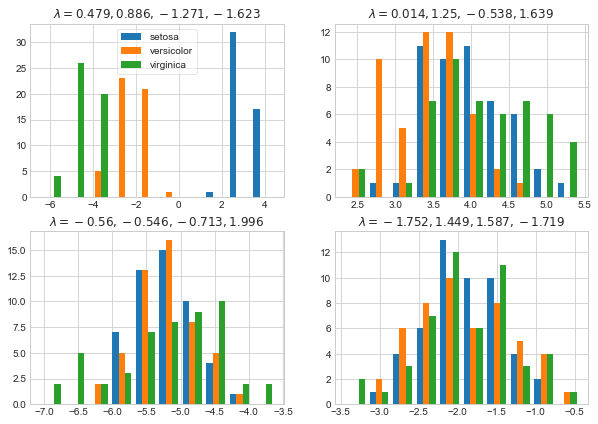

In [49]:
figure, axis = plt.subplots(2, 2)

labels = [ 'setosa', 'versicolor', 'virginica' ]
axis[0,0].hist(make_total_projection(seto, vers, virg, eigvecs[3]), label=labels)
axis[0,0].set_title('$\lambda = {eigvec}$'.format(eigvec= ', '.join(map(str, np.around(eigvecs[3],decimals=3)))))
axis[0,1].hist(make_total_projection(seto, vers, virg, eigvecs[2]))
axis[0,1].set_title('$\lambda = {eigvec}$'.format(eigvec= ', '.join(map(str, np.around(eigvecs[2],decimals=3)))))
axis[1,0].hist(make_total_projection(seto, vers, virg, eigvecs[1]))
axis[1,0].set_title('$\lambda = {eigvec}$'.format(eigvec= ', '.join(map(str, np.around(eigvecs[1],decimals=3)))))
axis[1,1].hist(make_total_projection(seto, vers, virg, eigvecs[0]))
axis[1,1].set_title('$\lambda = {eigvec}$'.format(eigvec= ', '.join(map(str, np.around(eigvecs[0],decimals=3)))))
axis[0,0].legend(frameon=True, framealpha=0.5)
plt.show()

### Figure 3.2.2

In [50]:
plt.rcParams['figure.figsize'] = [7, 5]

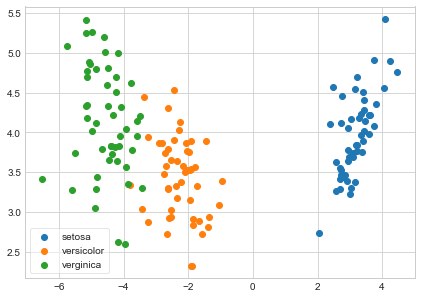

In [51]:
seto_X = np.dot(seto, eigvecs[3])
seto_Y = np.dot(seto, eigvecs[2])

vers_X = np.dot(vers, eigvecs[3])
vers_Y = np.dot(vers, eigvecs[2])

virg_X = np.dot(virg, eigvecs[3])
virg_Y = np.dot(virg, eigvecs[2])

plt.scatter(seto_X, seto_Y, label='setosa')
plt.scatter(vers_X, vers_Y, label='versicolor')
plt.scatter(virg_X, virg_Y, label='verginica')
plt.legend(frameon=True, framealpha=0.5)

plt.show()

In [58]:
def softmax(z):
    
    # z --> linear part
    
    exp = np.exp(z - np.max(z))
    
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
        
    return exp

def fit(X, y, lr, c, epochs, seed=2):
    
    # X --> Input
    # y --> true/target value
    # lr --> Learning rate
    # c --> Number of classes
    # epochs --> Number of iterations
    
    m, n = X.shape
    np.random.seed(seed)
    w = np.random.random((n, c))
    b = np.random.random(c)
    losses = []
    
    for e in range(epochs):
        z = X@w + b
        y_ = softmax(z)
        
        y_clear = np.zeros((len(y), c))
        y_clear[np.arange(len(y)), y] = 1
        
        w_grad = (1/m) * np.dot(X.T, (y_ - y_clear)) 
        b_grad = (1/m) * np.sum(y_ - y_clear)
        
        w = w - lr*w_grad
        b = b - lr*b_grad
        
        loss = -np.mean(np.log(y_[np.arange(len(y)), y]))
        losses.append(loss)
        
    return w, b, losses

In [59]:
def predict(X, w, b):
    
    # X --> Input
    # w --> weights
    # b --> bias
    
    z = X @ w + b
    y_ = softmax(z)
    
    return np.argmax(y_, axis=1)

def accuracy(y, y_):
    
    # y --> goal
    # y_ --> prediction
    
    return np.sum(y==y_)/len(y)

In [60]:
# format data
def merge(X, Y):
    
    # X --> inputs
    # Y --> outputs (equal length)
    
    Z = []
    
    for i in range(len(Y)):
        Z.append([X[i], Y[i]])
        
    Z = np.reshape(Z, (len(Y), 2))
    
    return Z

In [61]:
seto = merge(seto_X, seto_Y)
vers = merge(vers_X, vers_Y)
virg = merge(virg_X, virg_Y)

X = np.concatenate([seto, vers, virg], axis=0)
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

w, b, l = fit(X_train, y_train, lr=0.9, c=3, epochs=4000)

test_prediction = predict(X_test, w, b)
print('accuracy = {accuracy}'.format(accuracy=accuracy(y_test, test_prediction)))

accuracy = 0.96


### Figure 3.2.3

In [62]:
plt.rcParams['figure.figsize'] = [10, 5]

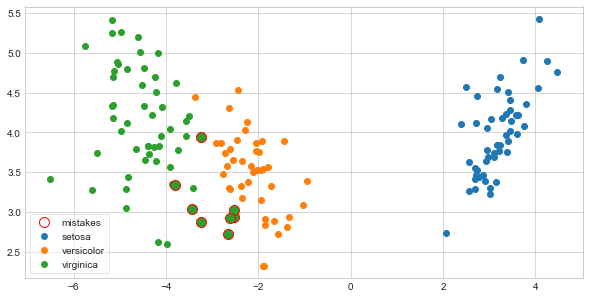

In [63]:
prediction = predict(X, w, b)

from matplotlib.lines import Line2D

for i in range(len(y)):
    if (prediction[i] == y[i]):
        if (y[i] == 0):
            plt.scatter(X[i][0], X[i][1], c='C0', label='setosa')
        else :
            if (y[i] == 1):
                plt.scatter(X[i][0], X[i][1], c='C1', label='versicolor')
            else :
                plt.scatter(X[i][0], X[i][1], c='C2', label='virginica')

for i in range(len(y)):
    if (prediction[i] != y[i]):            
        if (prediction[i] == 0):
            plt.scatter(X[i][0], X[i][1], c='C0', edgecolor='r', linewidth=1, s=100)
        else :
            if (prediction[i] == 1):
                plt.scatter(X[i][0], X[i][1], c='C1', edgecolor='r', linewidth=1, s=100)
            else :
                plt.scatter(X[i][0], X[i][1], c='C2', edgecolor='r', linewidth=1, s=100)

plt.legend(handles=[Line2D([0], [0], marker='o', color='w', markeredgecolor='r', label='mistakes', markersize=10),
                   Line2D([0], [0], marker='o', color='w',  markerfacecolor='C0', label='setosa', markersize=8),
                   Line2D([0], [0], marker='o', color='w',  markerfacecolor='C1', label='versicolor', markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='C2', label='virginica', markersize=8)],
                   frameon=True, framealpha=0.5)
plt.show()